Most of this code can be found at <a href='https://keras.io'>keras.io</a>

## Questions
...

Multilayer Perceptron: Neural Network with multiple hidden layers


## Objectives 
YWBAT 
- build a neural network using keras
- compare models based on their depth
- *choose the best optimizer for a model*

### Why do we use NNs?
- identify combinations of features and learn combinations of features
- reduces the need for domain expertise

### Outline
* Import data
* Build single layer model
* Build 2 layer model
* Students build their own deep learning model
* evaluate models, tune optimizers

# Useful Imports

In [197]:
import keras
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [198]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [199]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [200]:
"""
Attribute Information:

fLength: continuous # major axis of ellipse [mm]
fWidth: continuous # minor axis of ellipse [mm]
fSize: continuous # 10-log of sum of content of all pixels [in #phot]
fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
fConc1: continuous # ratio of highest pixel over fSize [ratio]
fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
fM3Long: continuous # 3rd root of third moment along major axis [mm]
fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
fAlpha: continuous # angle of major axis with vector to origin [deg]
fDist: continuous # distance from origin to center of ellipse [mm]
class: g,h # gamma (signal), hadron (background)
"""

'\nAttribute Information:\n\nfLength: continuous # major axis of ellipse [mm]\nfWidth: continuous # minor axis of ellipse [mm]\nfSize: continuous # 10-log of sum of content of all pixels [in #phot]\nfConc: continuous # ratio of sum of two highest pixels over fSize [ratio]\nfConc1: continuous # ratio of highest pixel over fSize [ratio]\nfAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]\nfM3Long: continuous # 3rd root of third moment along major axis [mm]\nfM3Trans: continuous # 3rd root of third moment along minor axis [mm]\nfAlpha: continuous # angle of major axis with vector to origin [deg]\nfDist: continuous # distance from origin to center of ellipse [mm]\nclass: g,h # gamma (signal), hadron (background)\n'

In [201]:
### Let's load in some custom data
df = pd.read_csv("MagicTelescope.csv")
display(df.head(2))
df.drop("ID", axis=1, inplace=True)
df.head(2)

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [209]:
X, y = df.drop('class:', axis=1), df["class:"]
y.shape

(19020,)

In [210]:
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()
y.shape, y

((19020, 2), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [212]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

In [213]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((11412, 10), (7608, 10), (11412, 2), (7608, 2))

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [214]:
from keras.models import Sequential # this just means we go through our network in order of our layers

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [220]:
from keras.layers import Dense

model = Sequential()

# first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=10)) 

# output layer
model.add(Dense(units=2, activation='softmax'))

In [221]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


Compile the model to a form that the computer can more easily work with

In [222]:
# gradient descent with momentum as our optimizer
model_optimizer = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=model_optimizer)

# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [224]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
11412/11412 [==============================] - 3s 303us/step - loss: 0.5710
Epoch 2/200
11412/11412 [==============================] - 1s 71us/step - loss: 0.4466: 0s - loss: 0.44 - ETA: 0s - loss: 0.44 - ETA: 0s - loss: 0.447
Epoch 3/200
11412/11412 [==============================] - 1s 66us/step - loss: 0.4187
Epoch 4/200
11412/11412 [==============================] - 1s 68us/step - loss: 0.4043: 0s - lo
Epoch 5/200
11412/11412 [==============================] - 1s 77us/step - loss: 0.3947
Epoch 6/200
11412/11412 [==============================] - 1s 80us/step - loss: 0.3875: 0s - loss: 0.38
Epoch 7/200
11412/11412 [==============================] - 1s 80us/step - loss: 0.3817: 0s - loss: 0.374 - ETA: 0s - loss: 
Epoch 8/200
11412/11412 [==============================] - 1s 75us/step - loss: 0.3768
Epoch 9/200
11412/11412 [==============================] - 1s 74us/step - loss: 0.3730
Epoch 10/200
11412/11412 [==============================] - 1s 80us/step - loss: 0.3693
E

11412/11412 [==============================] - 1s 80us/step - loss: 0.3120
Epoch 91/200
11412/11412 [==============================] - 1s 78us/step - loss: 0.3118
Epoch 92/200
11412/11412 [==============================] - 1s 77us/step - loss: 0.3115: 0s - loss: 0.311 - ETA: 0s - los
Epoch 93/200
11412/11412 [==============================] - 1s 79us/step - loss: 0.3114
Epoch 94/200
11412/11412 [==============================] - 1s 73us/step - loss: 0.3111
Epoch 95/200
11412/11412 [==============================] - 1s 78us/step - loss: 0.3106
Epoch 96/200
11412/11412 [==============================] - 1s 75us/step - loss: 0.3106
Epoch 97/200
11412/11412 [==============================] - 1s 71us/step - loss: 0.3102
Epoch 98/200
11412/11412 [==============================] - 1s 78us/step - loss: 0.3098
Epoch 99/200
11412/11412 [==============================] - 1s 88us/step - loss: 0.3100
Epoch 100/200
11412/11412 [==============================] - 1s 85us/step - loss: 0.3095: 0s - loss

11412/11412 [==============================] - 1s 74us/step - loss: 0.2980
Epoch 180/200
11412/11412 [==============================] - 1s 70us/step - loss: 0.2984
Epoch 181/200
11412/11412 [==============================] - 1s 83us/step - loss: 0.2984
Epoch 182/200
11412/11412 [==============================] - 1s 81us/step - loss: 0.2978
Epoch 183/200
11412/11412 [==============================] - 1s 87us/step - loss: 0.2979
Epoch 184/200
11412/11412 [==============================] - 1s 75us/step - loss: 0.2980
Epoch 185/200
11412/11412 [==============================] - 1s 79us/step - loss: 0.2978
Epoch 186/200
11412/11412 [==============================] - 1s 77us/step - loss: 0.2975: 0s - loss: 0.29
Epoch 187/200
11412/11412 [==============================] - 1s 72us/step - loss: 0.2978
Epoch 188/200
11412/11412 [==============================] - 1s 68us/step - loss: 0.2974
Epoch 189/200
11412/11412 [==============================] - 1s 69us/step - loss: 0.2972
Epoch 190/200
1141

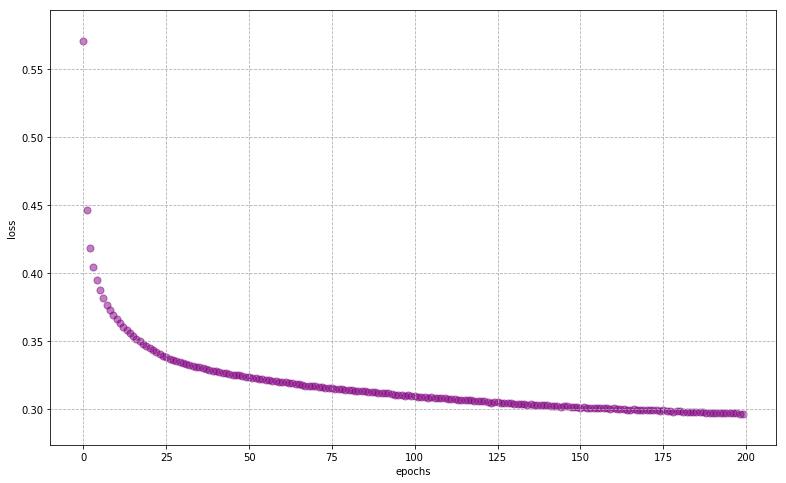

In [225]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [226]:
# Could also just use a batch to evaluate
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

7608/7608 [==============================] - 1s 160us/step


0.326356510634678

We can have predictions (probability the data point is a particular class based on our trained model)

In [227]:
probs = model.predict(x_test)
probs[:3]

array([[0.9566773 , 0.04332269],
       [0.6763478 , 0.32365215],
       [0.92335296, 0.07664701]], dtype=float32)

We want to say what is the predicted class, so we pick just the largest probability for each result

In [228]:
predictions = np.argmax(probs, axis=1)

predictions[:3]

array([0, 0, 0])

In [229]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86869085])

In [231]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4889
           1       0.86      0.75      0.80      2719

    accuracy                           0.87      7608
   macro avg       0.87      0.84      0.85      7608
weighted avg       0.87      0.87      0.87      7608



Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

### But Behold!!!! An out of the box RFC comes into the fold! 

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
clf = RandomForestClassifier()

In [234]:
clf.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [235]:
clf_preds = clf.predict(x_test)
clf.score(x_test, y_test)

0.8409568874868559

In [236]:
report = classification_report(y_test, clf_preds)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4889
           1       0.87      0.73      0.80      2719

   micro avg       0.88      0.84      0.86      7608
   macro avg       0.88      0.82      0.84      7608
weighted avg       0.88      0.84      0.86      7608
 samples avg       0.84      0.84      0.84      7608



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


### Let's add another Layer

In [237]:
### Let's build a new model and add another layer
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=10, units=32, activation='relu'))
model_mlp.add(Dense(units=32, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=2, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 66        
Total params: 1,474
Trainable params: 1,474
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
11412/11412 [==============================] - 3s 269us/step - loss: 0.5848 0s - loss: 
Epoch 2/100
11412/11412 [==============================] - 1s 89us/step - loss: 0.4602
Epoch 3/100
11412/11412 [==============================] - 1s 88us/step - loss: 0.4175
Epoch 4/100
11412/11412 [==============================] - 1s 89us/step - loss: 0.4010: 0s - l - ETA: 0s - loss: 0.401
Epoch 5/100
11412/11412 [==============================] - 1s 97us/step - loss: 0.3911
Epoch 6/100
11412/11412 [==============================] - 1s 99us/step - loss: 0.3838
Epoch 7/100
11412/11412 [==============================] - 1s 95us/step - loss: 0.3773
Epoch 8/100
11412/11412 [==============================] - 1s 87us/step - loss: 0.3715
Epoch 9/100
11412/11412 [==============================] - 1s 64us/step - loss: 0.3666
Epoch 10/100
11412/11412 [==============================] - 1s 71us/step - loss: 0.3623: 0s - loss: 
Epoch 11/100
11412/11412 [==============================] - 1s 78us/ste

11412/11412 [==============================] - 1s 87us/step - loss: 0.2914
Epoch 91/100
11412/11412 [==============================] - 1s 92us/step - loss: 0.2910
Epoch 92/100
11412/11412 [==============================] - 1s 104us/step - loss: 0.2904
Epoch 93/100
11412/11412 [==============================] - 1s 95us/step - loss: 0.2907
Epoch 94/100
11412/11412 [==============================] - 1s 82us/step - loss: 0.2898
Epoch 95/100
11412/11412 [==============================] - 1s 79us/step - loss: 0.2893
Epoch 96/100
11412/11412 [==============================] - 1s 77us/step - loss: 0.2892
Epoch 97/100
11412/11412 [==============================] - 1s 87us/step - loss: 0.2891
Epoch 98/100
11412/11412 [==============================] - 1s 95us/step - loss: 0.2889
Epoch 99/100
11412/11412 [==============================] - 1s 83us/step - loss: 0.2883
Epoch 100/100
11412/11412 [==============================] - 1s 79us/step - loss: 0.2884


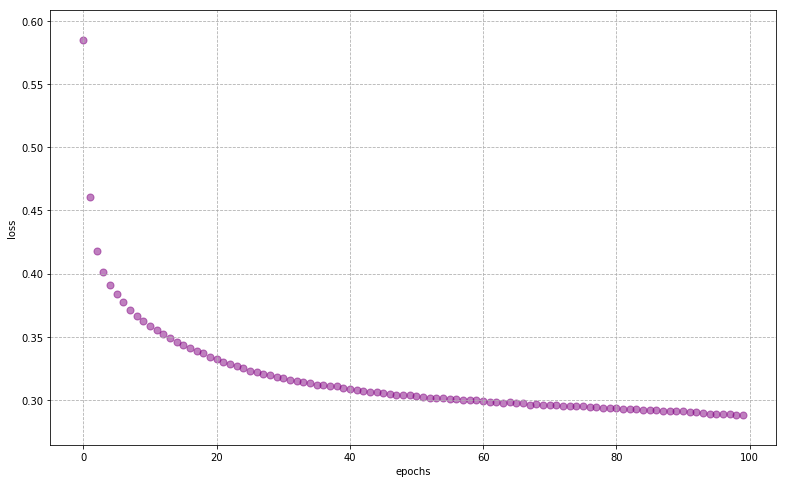

In [238]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

plot_history(history_mlp)

In [239]:
loss_and_metrics = model_mlp.evaluate(x_test, y_test)

loss_and_metrics

7608/7608 [==============================] - 1s 166us/step


0.32180120914265686

In [240]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86987382])

In [241]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1, 2])
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4889
           1       0.89      0.73      0.80      2719
           2       0.00      0.00      0.00         0

   micro avg       0.87      0.87      0.87      7608
   macro avg       0.58      0.56      0.57      7608
weighted avg       0.87      0.87      0.87      7608



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Add another layer and plot the loss

In [243]:
# Build your model
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=10, units=16, activation='relu'))
model_mlp.add(Dense(units=32, activation='relu'))
model_mlp.add(Dense(units = 64, activation = 'relu'))

# classifier layer
model_mlp.add(Dense(units=2, activation='softmax'))


display(model_mlp.summary())

# Compile it


# fit your model using 100 epochs


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_67 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 130       
Total params: 2,962
Trainable params: 2,962
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/100
11412/11412 [==============================] - 3s 290us/step - loss: 0.5433
Epoch 2/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.4432
Epoch 3/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.4137
Epoch 4/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.3984
Epoch 5/100
11412/11412 [==============================] - 1s 82us/step - loss: 0.3867
Epoch 6/100
11412/11412 [==============================] - 1s 78us/step - loss: 0.3767
Epoch 7/100
11412/11412 [==============================] - 1s 79us/step - loss: 0.3688: 0s - loss: 0.369
Epoch 8/100
11412/11412 [==============================] - 1s 79us/step - loss: 0.3613
Epoch 9/100
11412/11412 [==============================] - 1s 91us/step - loss: 0.3558
Epoch 10/100
11412/11412 [==============================] - 1s 96us/step - loss: 0.3519
Epoch 11/100
11412/11412 [==============================] - 1s 83us/step - loss: 0.3484
Epoch 12/100
11412/114

11412/11412 [==============================] - 1s 82us/step - loss: 0.2922
Epoch 92/100
11412/11412 [==============================] - 1s 84us/step - loss: 0.2914
Epoch 93/100
11412/11412 [==============================] - 1s 92us/step - loss: 0.2915
Epoch 94/100
11412/11412 [==============================] - 1s 82us/step - loss: 0.2911
Epoch 95/100
11412/11412 [==============================] - 1s 92us/step - loss: 0.2911
Epoch 96/100
11412/11412 [==============================] - 1s 89us/step - loss: 0.2910
Epoch 97/100
11412/11412 [==============================] - 1s 88us/step - loss: 0.2910: 0s - loss: 0.29
Epoch 98/100
11412/11412 [==============================] - 1s 76us/step - loss: 0.2900
Epoch 99/100
11412/11412 [==============================] - 1s 88us/step - loss: 0.2904
Epoch 100/100
11412/11412 [==============================] - 1s 78us/step - loss: 0.2899


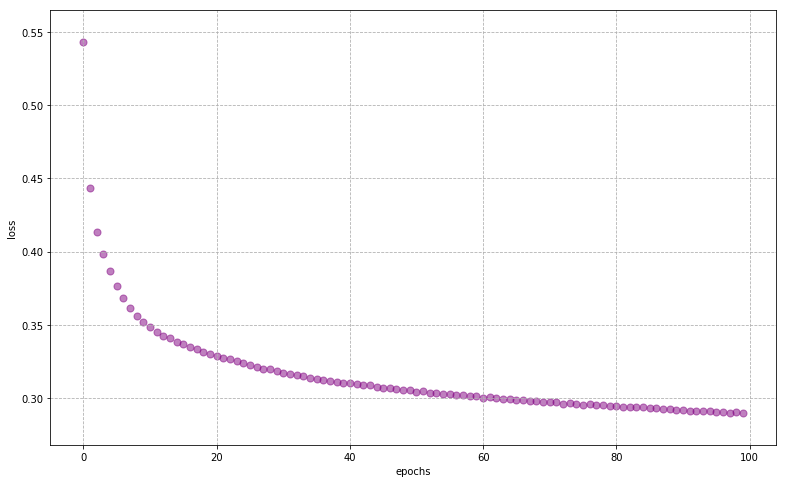

In [244]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

plot_history(history_mlp)

In [245]:
# Evaluate your model
model_mlp.evaluate(x_test, y_test)

7608/7608 [==============================] - 1s 149us/step


0.3273864924656981

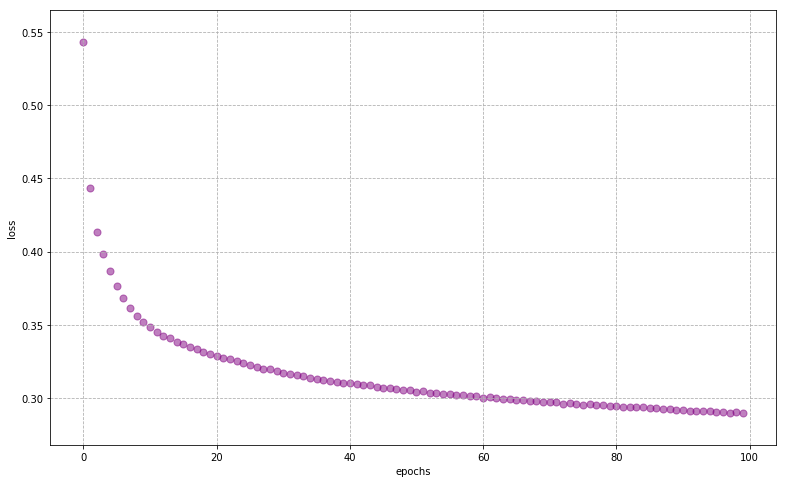

In [246]:
# Plot your loss
plot_history(history_mlp)

In [247]:
### Let's make it better
### Let's build a new model and add another layer
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=10, units=32, activation='relu'))
model_mlp.add(Dense(units=32, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=2, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 66        
Total params: 1,474
Trainable params: 1,474
Non-trainable params: 0
_________________________________________________________________


In [248]:
model_mlp.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam())

In [251]:
history_mlp = model_mlp.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
11412/11412 [==============================] - 1s 48us/step - loss: 0.2719
Epoch 2/50
11412/11412 [==============================] - 1s 47us/step - loss: 0.2710
Epoch 3/50
11412/11412 [==============================] - 1s 51us/step - loss: 0.2717
Epoch 4/50
11412/11412 [==============================] - 1s 49us/step - loss: 0.2698
Epoch 5/50
11412/11412 [==============================] - 1s 48us/step - loss: 0.2704
Epoch 6/50
11412/11412 [==============================] - 1s 47us/step - loss: 0.2705
Epoch 7/50
11412/11412 [==============================] - 1s 49us/step - loss: 0.2701
Epoch 8/50
11412/11412 [==============================] - 1s 54us/step - loss: 0.2694
Epoch 9/50
11412/11412 [==============================] - 1s 49us/step - loss: 0.2689
Epoch 10/50
11412/11412 [==============================] - 1s 50us/step - loss: 0.2697
Epoch 11/50
11412/11412 [==============================] - 1s 52us/step - loss: 0.2689
Epoch 12/50
11412/11412 [===========================

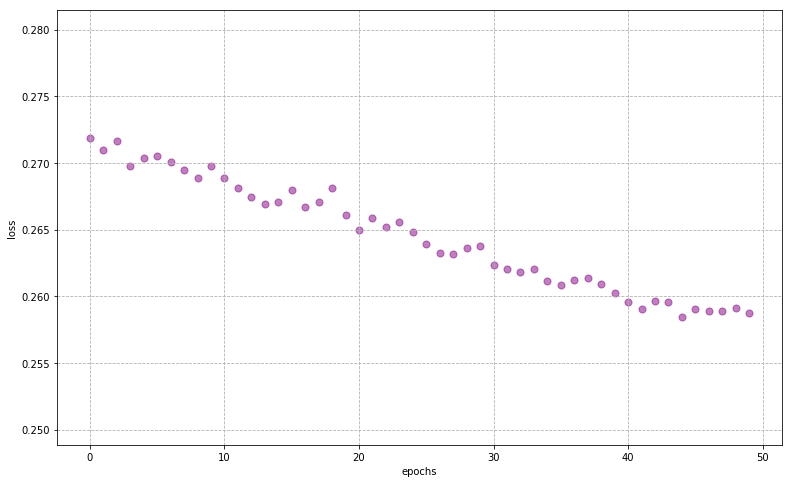

In [252]:
plot_history(history_mlp)

In [253]:
model_mlp.evaluate(x_test, y_test)

7608/7608 [==============================] - 1s 197us/step


0.33382856247302234

In [254]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86119874])

In [257]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4889
           1       0.84      0.75      0.79      2719

    accuracy                           0.86      7608
   macro avg       0.86      0.84      0.84      7608
weighted avg       0.86      0.86      0.86      7608

